<div>
<img src="https://xmks.s3.amazonaws.com/2020/XMPRO-Blue.png" width="500" align="left"/>
</div>

# RUL Pump - Regression Machine Learning Example

*Imports*

In [1]:
import joblib
import seaborn as sns
import os
import pandas as pd
import numpy as np
np.random.seed(1337)

from IPython.display import Image

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

*Set options*

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows=50

# DATA
## Read CSV

In [3]:
df = pd.read_csv('rul_hrs.csv', index_col=0)

# drop the timestamp column as this model is not taking time into consideration
df.drop('timestamp', axis = 1, inplace = True)

## Explore
An initial step with a brand new repositry of data is to check the data types and some basic metrics of the variables.

In [4]:
print('dtype of all variables: ', df.dtypes.unique()[0])
print('Number of NA: ', sum(df.isna().sum()))
df.describe().T

dtype of all variables:  float64
Number of NA:  0


,count,mean,std,min,25%,50%,75%,max
sensor_00,166441.000,2.349,0.447,0.000,2.404,2.456,2.498,2.549
sensor_01,166441.000,47.017,3.424,22.439,45.790,47.613,49.002,55.773
sensor_02,166441.000,50.628,4.140,33.160,50.130,51.649,52.951,56.033
sensor_03,166441.000,43.338,2.585,31.641,42.361,43.793,44.965,48.220
sensor_04,166441.000,577.716,161.666,2.798,624.884,631.713,636.921,800.000
...,...,...,...,...,...,...,...,...
sensor_47,166441.000,43.246,9.088,27.199,38.773,41.956,46.007,220.486
sensor_48,166441.000,122.100,63.938,26.331,73.495,109.954,163.194,502.315
sensor_49,166441.000,52.637,14.243,26.620,46.586,50.926,56.134,458.623
sensor_51,166441.000,202.055,119.694,27.778,178.241,197.917,210.938,1000.000


A set of sensor data all float64, with no missing values.

### Correlation plot
A good insight into the interaction between variables, specifically the RUL response variable.

<Axes: >

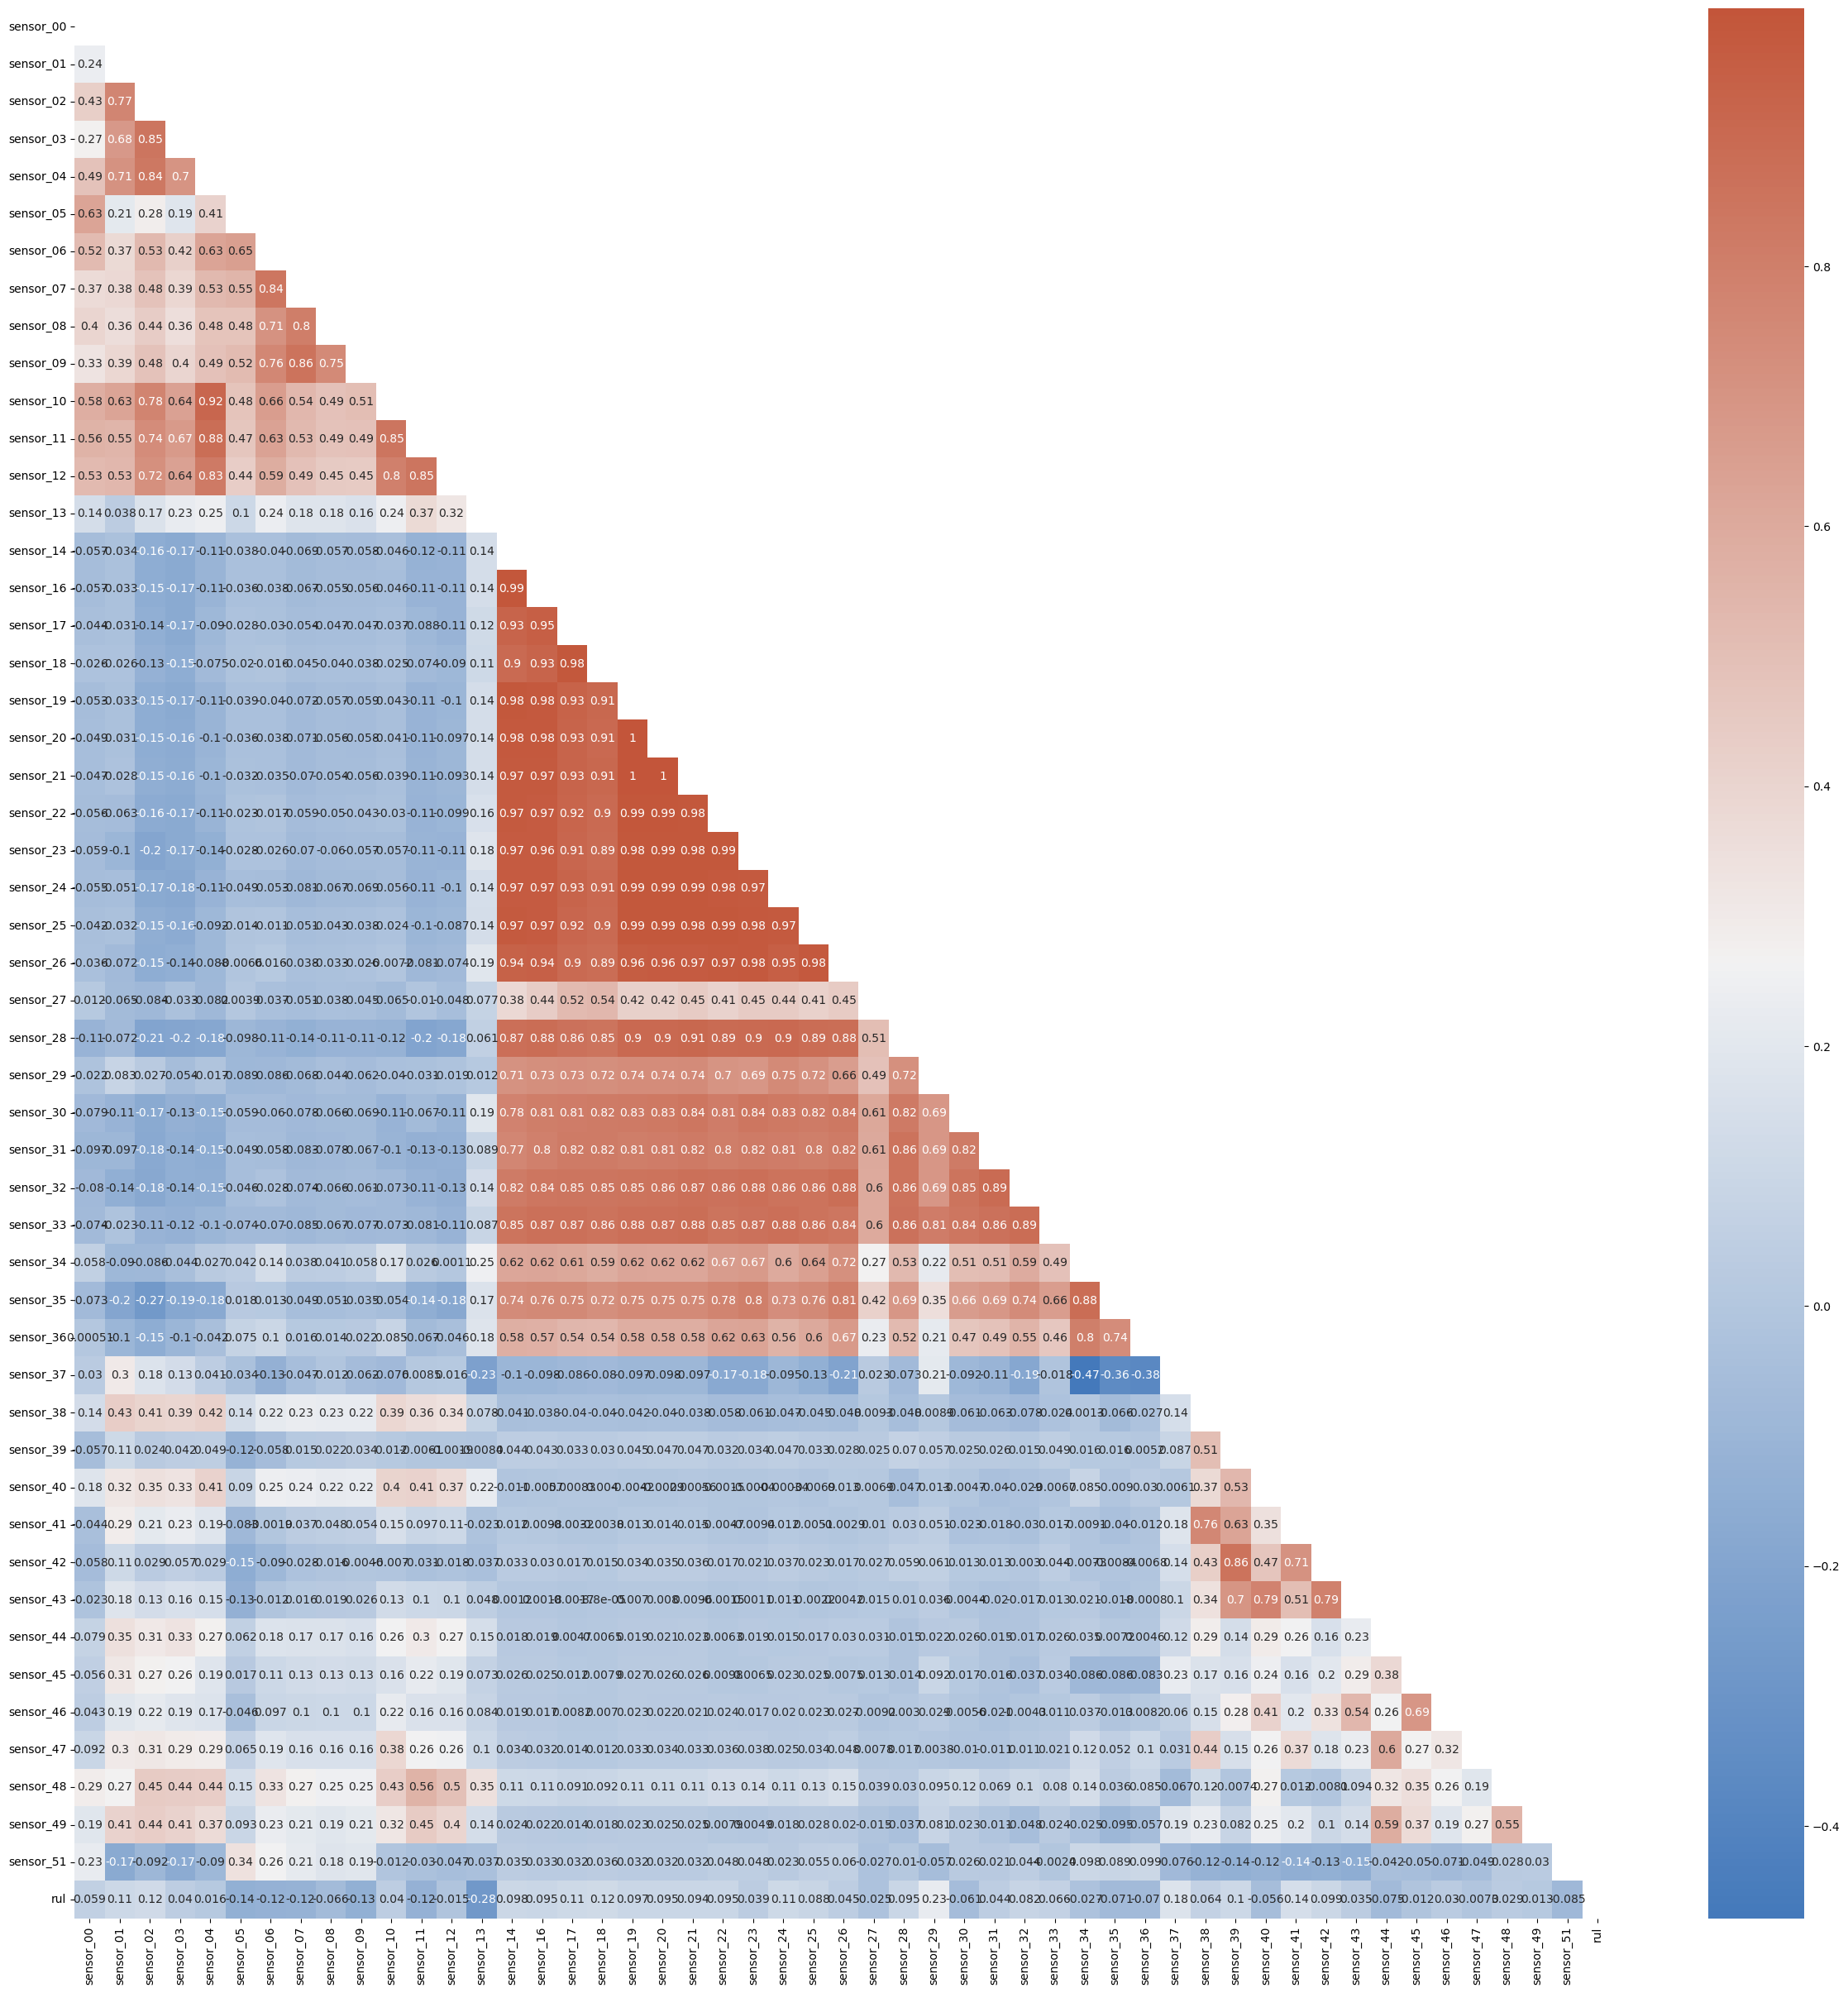

In [5]:
# Correlation calculation on dataframe
corr = df.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(30, 30))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(250, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

`sensor_29` appears to have the strongest correlation with RUL

### Histogram Plot
Histograms can give an idea of the distribution of each variable.

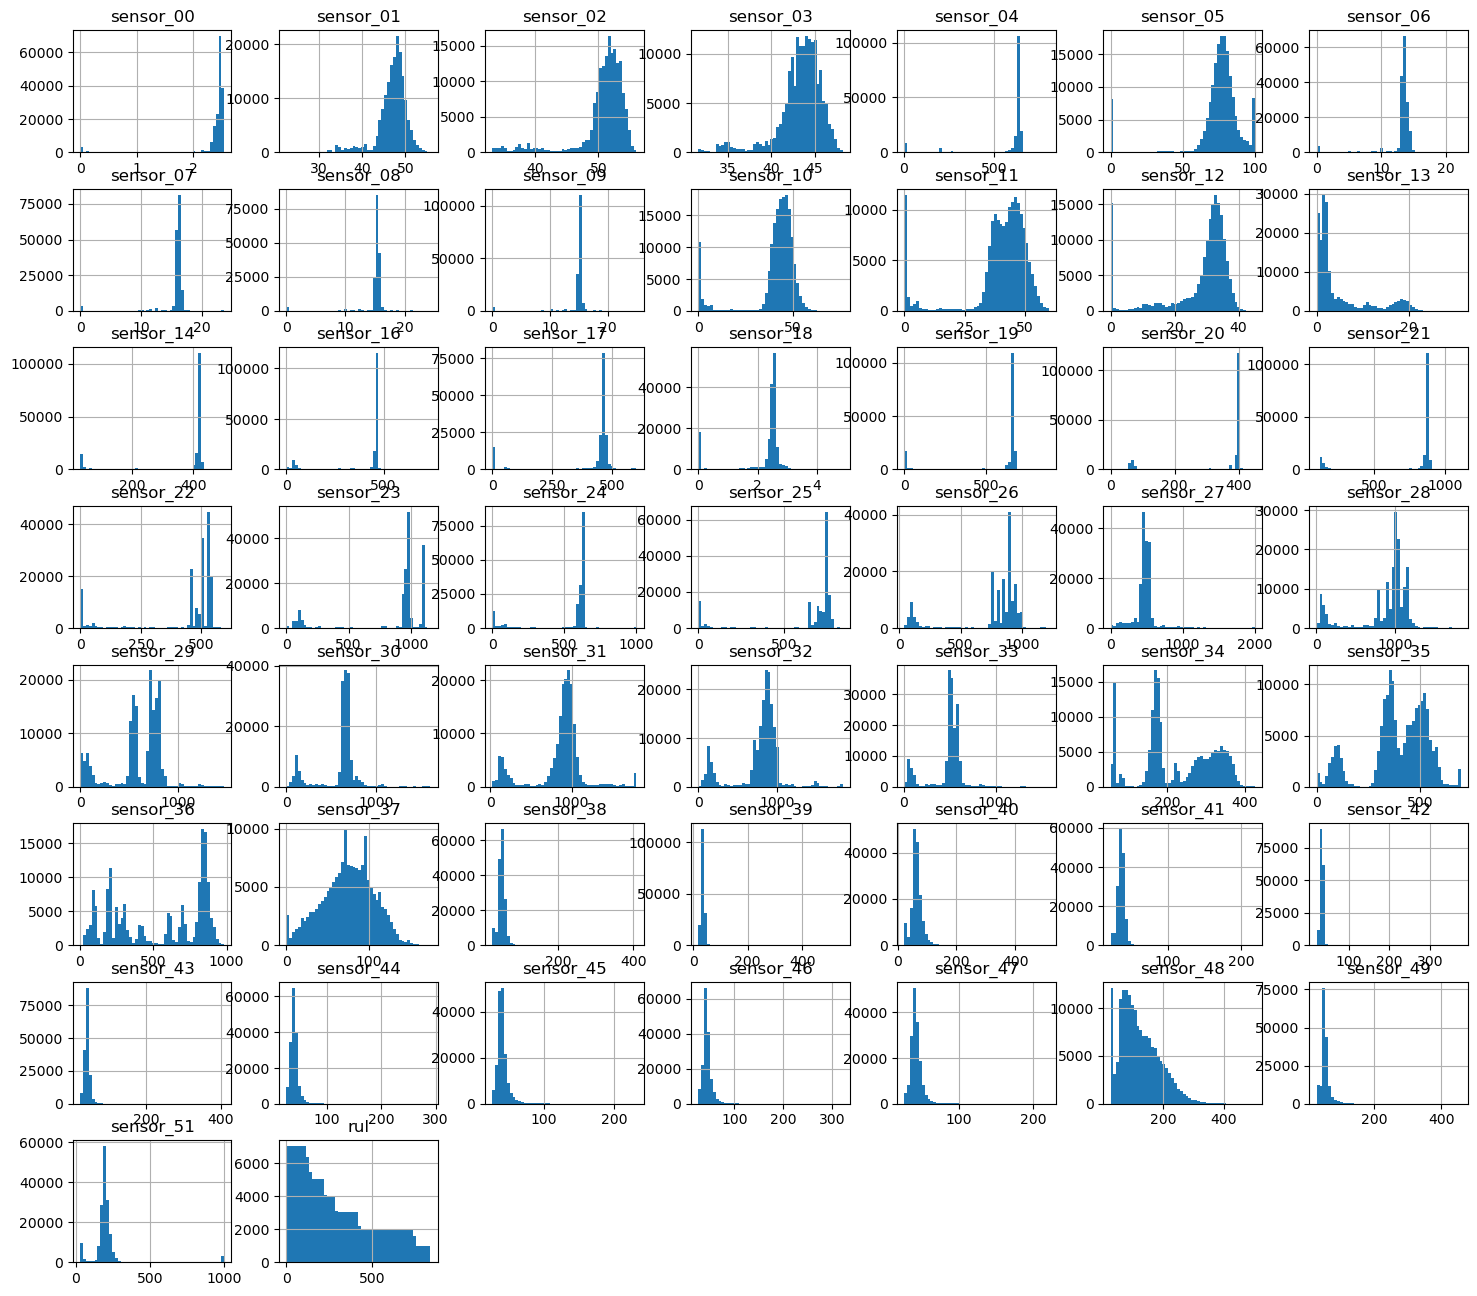

In [6]:
df.hist(bins=50, figsize=(18,16))
plt.show()

# Test and train data split

In [7]:
# Set explanatory and response data - RUL is our response variable
X, y = df.loc[:, df.columns != "rul"], df["rul"]

# Split the data for training to give a span of the dataset without overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train and test random forest

In [ ]:
# Create a pipeline to scale and run the random forrest model
pipe = Pipeline([('scaler', StandardScaler()), ('RF', RandomForestRegressor())])

# Fit the model
pipe.fit(X_train, y_train)

# Measure the model score
pipe.score(X_test, y_test)

## Check most important features

In [ ]:
# setup figure 
f, ax = plt.subplots(figsize=(20, 8))

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df.columns, pipe.steps[1][1].feature_importances_):
    feats[feature] = importance #add the name/value pair 

# importance based on Gini score
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45, ax=ax)

`sensor_29` does appear to have an influence on the RUL as suggested by the correlation plot - with a set of other sensors also influencing the RUL.

# Save the model to use

In [ ]:
# explore the model
pipe

In [ ]:
# import plotly.express as px
# df.timestamp = pd.to_datetime(df.timestamp)
# normalized_df=(df-df.min())/(df.max()-df.min())
# #normalized_df.plot(figsize=(20, 8))
# fig = px.line(normalized_df, x='timestamp', y=['sensor_' + str(x).zfill(2) for x in range(52)], title='Remaining Use of Life - Normalized')
# fig.show()

## Save the model

In [ ]:
# save
joblib.dump(pipe, "rul_random_forest.joblib")

This model is quite large - lets try a Gradient Boosting Regressor:

# Train and Test Gradient Boosting Regressor

In [ ]:
# Create a pipeline to scale and run the gradient boosting regressor model
GBR = Pipeline([('scaler', StandardScaler()), ('RF', GradientBoostingRegressor())])

# Fit the model
GBR.fit(X_train, y_train)

# Measure the model score
GBR.score(X_test, y_test)

In [ ]:
# save
joblib.dump(GBR, "rul_pump_gbr.joblib")